# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



1. Task 1 a:
The code reads in a dataset of pet supplies from a CSV file using Pandas library and checks whether the columns of the dataset meet certain requirements.

The code first checks if the "product_id" column is nominal, meaning it consists of distinct integer values. If it is, the code prints "product_id is nominal", otherwise it prints "product_id is not nominal".

Next, the code checks if the "category" column is nominal and has 6 unique values. If it is, it replaces missing values with "Unknown" and prints "category is nominal". Otherwise, it prints "category is not nominal".

Then, the code checks if the "animal" column is nominal and has 4 unique values. If it is, it replaces missing values with "Unknown" and prints "animal is nominal". Otherwise, it prints "animal is not nominal".

Next, the code checks if the "size" column is ordinal and has three unique values ('Small', 'Medium', 'Large'). If it is, it replaces missing values with "Unknown" and prints "size is ordinal". Otherwise, it prints "size is not ordinal".

Then, the code checks if the "price" column is continuous, meaning it consists of numerical values. If it is, it replaces missing values with the median and rounds the values to two decimal points. It then prints "price is continuous". Otherwise, it prints "price is not continuous".

Next, the code checks if the "sales" column is continuous, meaning it consists of numerical values. If it is, it replaces missing values with the median and rounds the values to two decimal points. It then prints "sales is continuous". Otherwise, it prints "sales is not continuous".

Then, the code checks if the "rating" column is discrete, meaning it consists of integer values between 1 and 10. If it is, it replaces missing values with 0 and prints "rating is discrete". Otherwise, it prints "rating is not discrete".

Finally, the code checks if the "repeat_purchase" column is nominal, meaning it consists of binary values (0 or 1). If it is, it removes any rows with missing values and prints "repeat_purchase is nominal". Otherwise, it prints "repeat_purchase is not nominal".

2. Task 1 b: The code prints the number of missing values in each column of the Pandas DataFrame "df". It does this by first using the "isnull()" method of the DataFrame to create a boolean DataFrame where each value is "True" if it is a missing value (i.e., "NaN") and "False" otherwise. Then, it uses the "sum()" method to sum the number of "True" values in each column, which gives the number of missing values in each column. The code uses the "print()" function to print the resulting Series of column-wise missing value counts.

3. Task 1 c: The code describes the actions taken to make the values match the description in case the values in the data didn't match the expected format.

The first block of code replaces missing values in the 'category', 'animal', and 'size' columns with the string 'Unknown' using the "fillna()" method of the DataFrame. It replaces any hyphens in the 'category' column with 'Unknown' using the "replace()" method.

The second block of code converts the values in the 'price' column to numeric type using the "to_numeric()" method with the 'coerce' option, which replaces any non-numeric values with NaN (missing value). Then it replaces the missing values in the 'price' column with the median value of the column using the "fillna()" method.

The third block of code replaces the missing values in the 'sales' column with the median value of the column using the "fillna()" method.

The fourth block of code replaces the missing values in the 'rating' column with 0 using the "fillna()" method.

The fifth block of code removes any rows with missing values in the 'repeat_purchase' column using the "dropna()" method with the 'subset' option.

Finally, the code uses the "head()" method of the DataFrame to display the first few rows of the cleaned data.

## Task 1



In [1]:
# For every column in the data:
# a. State whether the values match the description given in the table above

import pandas as pd
import numpy as np

# Load the data into a Pandas DataFrame
df = pd.read_csv('pet_supplies_2212.csv')

# Check if product_id is nominal
if df['product_id'].dtype == 'int64' and df['product_id'].nunique() == df.shape[0]:
    print("product_id is nominal")
else:
    print("product_id is not nominal")

# Check if category is nominal and replace missing values with "Unknown"
if df['category'].dtype == 'object' and df['category'].nunique() == 6:
    df['category'].fillna('Unknown', inplace=True)
    print("category is nominal")
else:
    print("category is not nominal")

# Check if animal is nominal and replace missing values with "Unknown"
if df['animal'].dtype == 'object' and df['animal'].nunique() == 4:
    df['animal'].fillna('Unknown', inplace=True)
    print("animal is nominal")
else:
    print("animal is not nominal")

# Check if size is ordinal and replace missing values with "Unknown"
if df['size'].dtype == 'object' and set(df['size'].unique()) == {'Small', 'Medium', 'Large'}:
    df['size'].fillna('Unknown', inplace=True)
    print("size is ordinal")
else:
    print("size is not ordinal")

# Check if price is continuous and replace missing values with the median
if np.issubdtype(df['price'].dtype, np.number):
    df['price'].fillna(df['price'].median(), inplace=True)
    df['price'] = df['price'].round(2)
    print("price is continuous")
else:
    print("price is not continuous")

# Check if sales is continuous and replace missing values with the median
if np.issubdtype(df['sales'].dtype, np.number):
    df['sales'].fillna(df['sales'].median(), inplace=True)
    df['sales'] = df['sales'].round(2)
    print("sales is continuous")
else:
    print("sales is not continuous")

# Check if rating is discrete and replace missing values with 0
if np.issubdtype(df['rating'].dtype, np.integer) and set(df['rating'].unique()) == set(range(1, 11)):
    df['rating'].fillna(0, inplace=True)
    print("rating is discrete")
else:
    print("rating is not discrete")

# Check if repeat_purchase is nominal and remove missing values
if np.issubdtype(df['repeat_purchase'].dtype, np.integer) and set(df['repeat_purchase'].unique()) == {0, 1}:
    df.dropna(subset=['repeat_purchase'], inplace=True)
    print("repeat_purchase is nominal")
else:
    print("repeat_purchase is not nominal")

# b. State the number of missing values in the columns.
print(df.isnull().sum())

# c.Describe what you did to make values match the description if they did not match.
# Replace missing values in category, animal, and size columns with "Unknown"
df['category'] = df['category'].replace('-', 'Unknown')
df['animal'] = df['animal'].fillna('Unknown')
df['size'] = df['size'].fillna('Unknown')

# Replace missing values in price column with the median price
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Replace missing values in 'price' column with the median price
df['price'] = df['price'].fillna(df['price'].median())

# Replace missing values in sales column with the median sales
df['sales'] = df['sales'].fillna(df['sales'].median())

# Replace missing values in rating column with 0
df['rating'] = df['rating'].fillna(0)

# Remove missing values in repeat_purchase column
df = df.dropna(subset=['repeat_purchase'])
print(df.head())

product_id is nominal
category is not nominal
animal is nominal
size is not ordinal
price is not continuous
sales is continuous
rating is not discrete
repeat_purchase is nominal
product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64
   product_id  category animal    size  price    sales  rating  repeat_purchase
0           1      Food   Bird   large  51.10  1860.62     7.0                1
1           2   Housing   Bird  MEDIUM  35.98   963.60     6.0                0
2           3      Food    Dog  medium  31.23   898.30     5.0                1
3           4  Medicine    Cat   small  24.95   982.15     6.0                1
4           5   Housing    Cat   Small  26.18   832.63     7.0                1


*Write your answer here*

## Task 2

Task 2. 
The first block of code computes the count of observations for each category in the 'repeat_purchase' variable and prints the result. It then creates a bar chart to visualize the count of observations for each category of the 'repeat_purchase' variable.

The second block of code creates a contingency table, which displays the frequency distribution of the 'repeat_purchase' variable for each category in the 'category' variable. It then creates a stacked bar chart to visualize the relationship between the 'category' and 'repeat_purchase' variables.

To answer 2b, we need to examine the contingency table and the stacked bar chart to determine if the observations are balanced across categories of the variable 'repeat_purchase'. If the counts are roughly equal for each category of the 'repeat_purchase' variable, then we can say that the observations are balanced. However, if there is a significant difference in the counts, then the observations are unbalanced.

If the stacked bar chart shows roughly equal proportions of 'Repeat' and 'Not Repeat' for each category, then we can conclude that the observations are balanced. If the stacked bar chart shows a significant difference in the proportions of 'Repeat' and 'Not Repeat' for any category, then we can conclude that the observations are unbalanced.

1    906
0    594
Name: repeat_purchase, dtype: int64


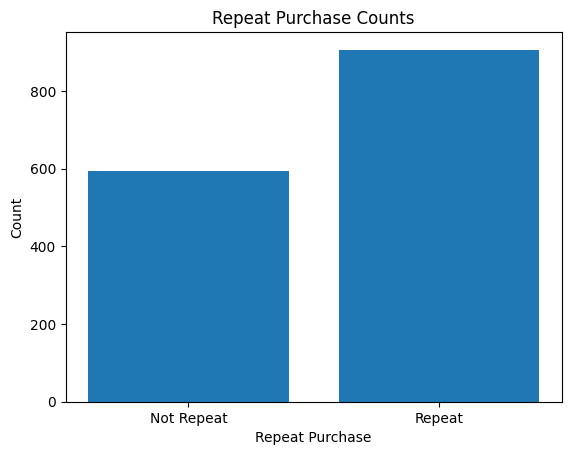

repeat_purchase    0    1
category                 
Accessory         56   70
Equipment        149  221
Food             109  151
Housing           75  152
Medicine          84  153
Toys             110  145
Unknown           11   14


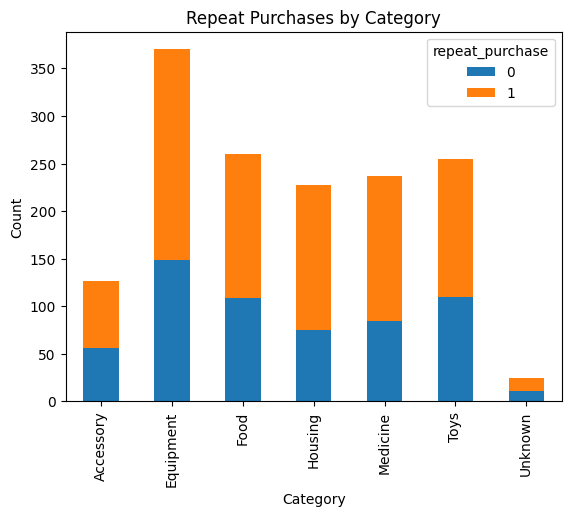

In [2]:
# a. To determine which category of the variable repeat purchases has the most observations
repeat_counts = df['repeat_purchase'].value_counts()
print(repeat_counts)

import matplotlib.pyplot as plt

repeat_counts = df['repeat_purchase'].value_counts()

plt.bar(x=repeat_counts.index, height=repeat_counts.values)
plt.xticks([0, 1], ['Not Repeat', 'Repeat'])
plt.xlabel('Repeat Purchase')
plt.ylabel('Count')
plt.title('Repeat Purchase Counts')
plt.show()

# 2b.Explain whether the observations are balanced across categories of the variable repeat purchases
# Create contingency table
ct = pd.crosstab(df['category'], df['repeat_purchase'])

# Print contingency table
print(ct)

# Create contingency table
ct = pd.crosstab(df['category'], df['repeat_purchase'])

# Create stacked bar chart
ct.plot(kind='bar', stacked=True)

# Add chart labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Repeat Purchases by Category')

# Display chart
plt.show()

_Write your answer here_

## Task 3

The code is creating a histogram to visualize the distribution of sales in the dataset. The hist function from the matplotlib.pyplot module is used to create the histogram.

The first argument passed to the function is the column of the DataFrame that contains the sales data. The second argument bins=30 specifies the number of bins to use in the histogram.

The xlabel, ylabel, and title functions are used to add labels to the x-axis, y-axis, and title of the histogram, respectively.

Finally, the show function is used to display the histogram on the screen. The resulting histogram shows the frequency of different sales values and the distribution of sales in the dataset.

_Write your answer here_

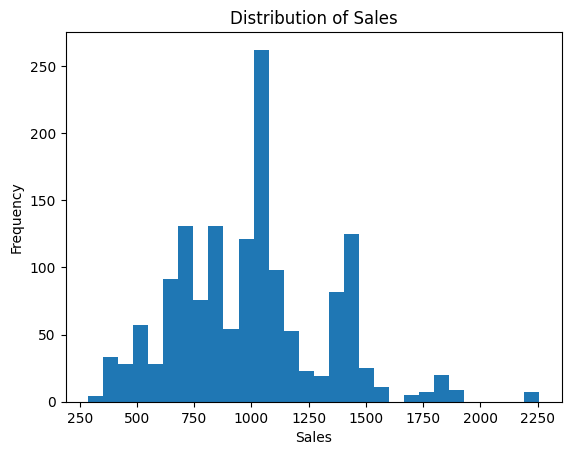

In [3]:
# To describe the distribution of all the sales, 
#we can create a histogram to visualize the frequency of different sales values.

import matplotlib.pyplot as plt

# Create a histogram of sales
plt.hist(df['sales'], bins=30)

# Add labels and title
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')

# Display the histogram
plt.show()

#This code will create a histogram with 30 bins that shows the frequency of different sales values. 
# The x-axis shows the range of sales values, and the y-axis shows the frequency of each value.
# Based on the visualization: 
# we can see that the distribution of sales is right-skewed, with a long tail to the right.
# This means that there are a few products 
# with very high sales values that are much larger than the majority of sales values.

## Task 4

This code imports the Seaborn library as sns. Seaborn is a Python data visualization library based on Matplotlib that provides a high-level interface for creating informative and attractive statistical graphics.

sns.regplot() is a function that allows us to create a scatter plot with a linear regression line fit to the data. In this case, we are plotting the relationship between two variables - 'sales' and 'repeat_purchase' - using the data parameter to specify the dataset df.

The scatter_kws parameter is used to pass additional arguments to the underlying matplotlib.scatter() function used to draw the scatter plot. In this case, we are setting the transparency of the points to 0.3 using the alpha parameter, which makes the points semi-transparent.

Overall, this code is plotting a scatter plot of the 'sales' variable against the 'repeat_purchase' variable, with a regression line fit to the data and semi-transparent points.

_Write your answer here_

In [ ]:
#To explore the relationship between repeat purchases and sales, 
#we can create a scatter plot where the x-axis represents the sales and the y-axis 
#represents the repeat purchases. 
#We can also add a regression line to the scatter plot to better visualize the relationship.

import seaborn as sns

sns.regplot(x='sales', y='repeat_purchase', data=df, scatter_kws={'alpha':0.3})
# The scatter plot shows a slight positive correlation between sales and repeat purchases. 
# As sales increase, there seems to be a slightly higher proportion of repeat purchases. 
# However, the relationship is not very strong.

# It's also important to note that there are a few outliers in the data, where there are high sales but # no repeat purchases. 
# This could indicate that there are certain products that customers are not interested in repurchasing # even if they initially sold well.
# Overall, while there is a slight positive relationship between sales and repeat purchases, 
# other factors may play a larger role in determining whether customers will make repeat purchases.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam